In [3]:
import matplotlib.pyplot as plt
import numpy as np

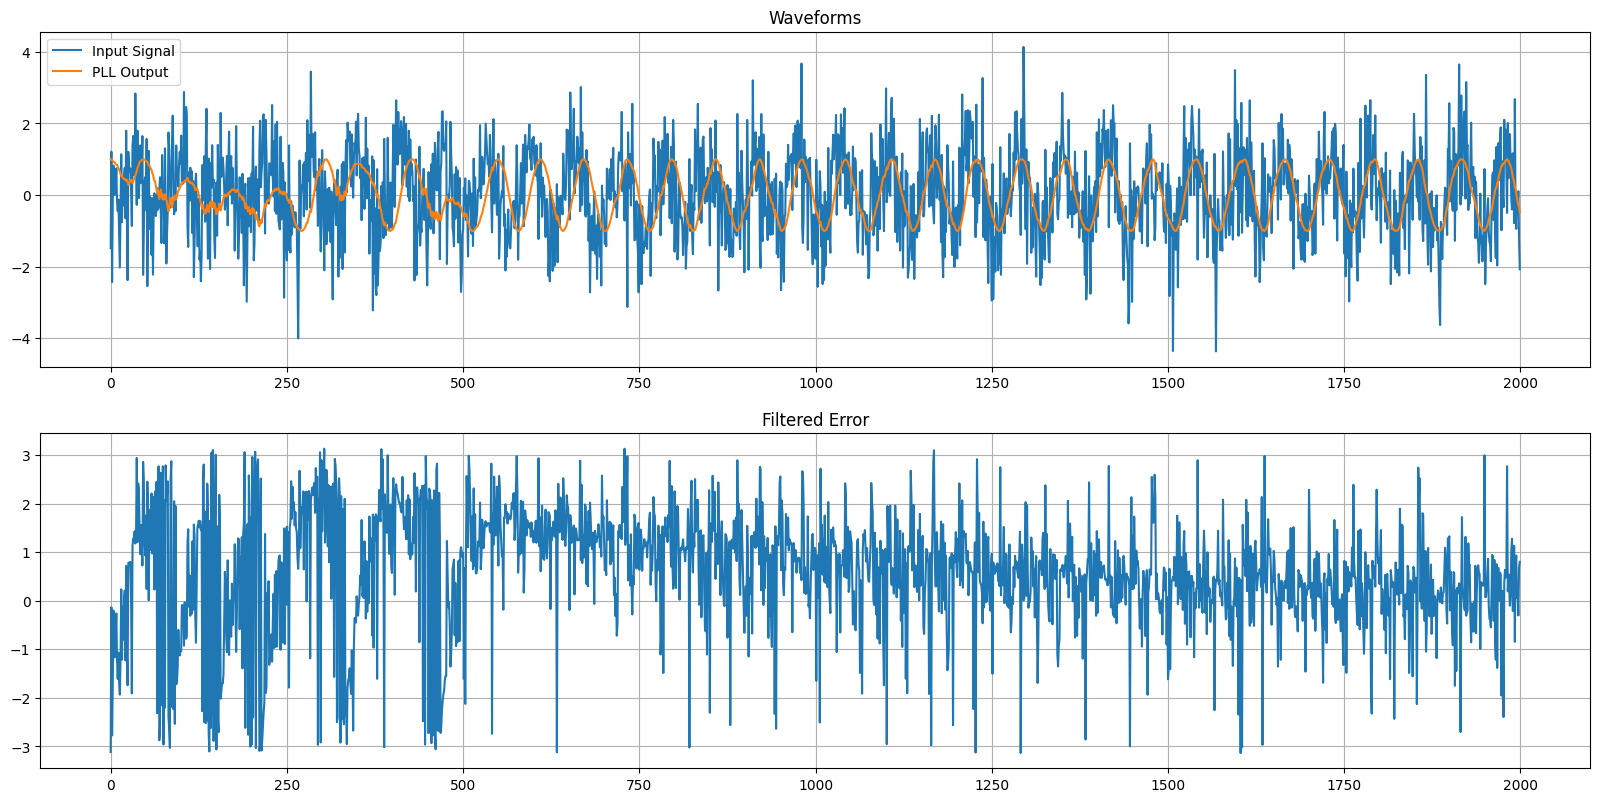

In [72]:
# https://liquidsdr.org/blog/pll-simple-howto/

class PhaseLockedLoop:
    def __init__( self ) -> None:
        self.alpha = 0.05
        self.beta  = 0.5*self.alpha*self.alpha;
        self.phase_out     = 0.0
        self.frequency_out_Hz = 0
        self.fs = 100
        self.last_out = np.exp(0j)

    def proc( self, in_, ):
        phase_error = np.angle( in_ * np.conj(self.last_out) )
        
        self.last_out = np.exp( 1.0j * self.phase_out )
        
        self.phase_out += self.alpha * phase_error
        self.frequency_out_Hz += self.beta * phase_error
        
        self.phase_out += self.frequency_out_Hz * 2 * np.pi / self.fs
        if self.phase_out > 2*np.pi:
            self.phase_out -= 2*np.pi
        
        return self.last_out, phase_error

fs = 100
duration_secs = 20
t = np.linspace(0,duration_secs, int(duration_secs*fs))
# t = np.arange( 0,200 )

in_A      = 1
in_f      = 10
in_phi    = np.random.normal(0, 0.1, size=len(t)) + np.pi # Sprinkle in a little phase noise
in_sig    = in_A * np.exp( 1.0j * (in_f * t + in_phi) )

in_sig +=  np.random.normal(0, 1.0, size=len(t)) # AWGN

e_D = [] #phase-error output
cos_out = []



pll = PhaseLockedLoop(  )
for n in range(len(in_sig)):
    out_sig, _e_D = pll.proc( in_sig[n] )

    cos_out.append( out_sig )
    e_D.append( _e_D )



# Create a Figure
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot(in_sig, label='Input Signal')
ax1.plot(cos_out, label='PLL Output')
plt.grid()
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(412)
ax2.plot( e_D )
plt.grid()
ax2.set_title('Filtered Error')
plt.show()